## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [22]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data

784594


"n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg\nn00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg\nn00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg\nn00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg\nn00015388_373\thttp://img172.imageshack.us/img172/4606/napo03072en9.jpg\nn00015388_379\thttp://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg\nn00015388_388\thttp://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg\nn00015388_442\thttp://www.porschemania.it/discus/messages/815/102099.jpg\nn00015388_474\thttp://farm1.static.flickr.com/72/225029238_805b0937ca.jpg\nn00015388_514\thttp://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg\nn00015388_671\thttp://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg\nn00015388_686

In [35]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data1 = data.split(split_tag)
print(len(data1))
data1[:5]

9996


['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'n00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'n00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg']

## 將 txt 轉成 pandas dataframe

In [44]:
import pandas as pd
arrange_data = [i.split('\t') for i in data1]
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

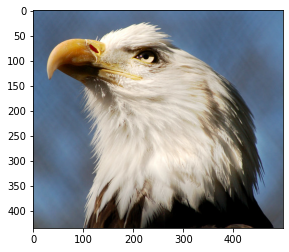

In [48]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [52]:
def img2arr_fromURLs(url_list, resize = False):

    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for i in url_list:
        try:
            response = requests.get(i)
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except Exception:
            print("The url at index %s is error")
    return img_list

The url at index %s is error
Total images that we got: 4 


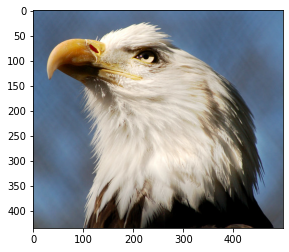

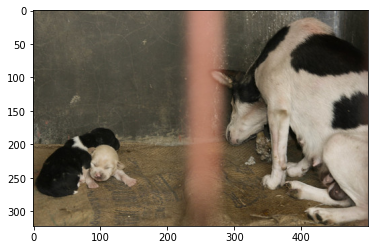

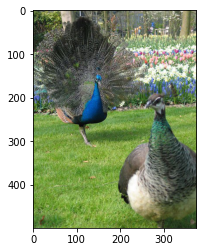

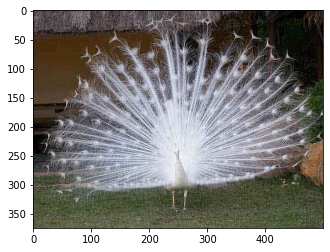

In [53]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()